## Explore Data

In [43]:
import pandas as pd

In [44]:
## Import the file
books = pd.read_csv('clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [45]:
## Sumaarize the data
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [46]:
## Each value along with frequency in a column
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [47]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [48]:
## Explain numeric columns
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='rating', ylabel='Count'>

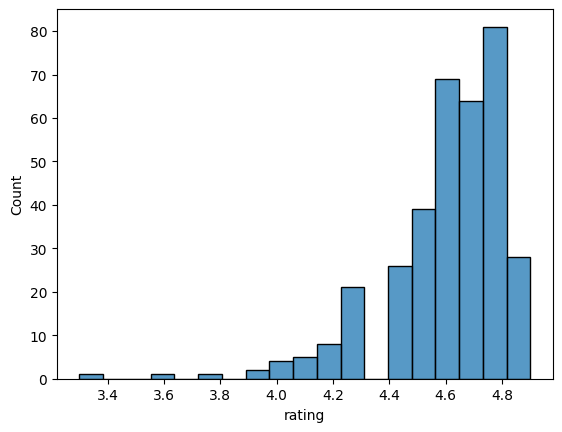

In [50]:
## Draw the histogram
sns.histplot(data=books,x='rating')

<Axes: xlabel='rating', ylabel='Count'>

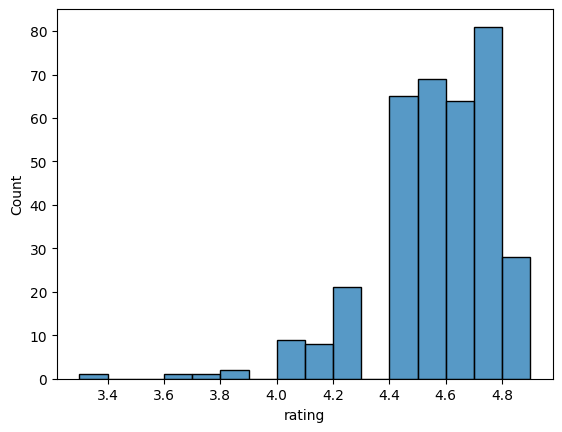

In [51]:
sns.histplot(data=books,x='rating',binwidth=0.1)

## Data Validation

In [52]:
## change the data type
books['year'] = books['year'].astype('int')
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [53]:
## validate categorical data
books['genre'].isin(['Fiction','Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [54]:
## use til operate 
~books['genre'].isin(['Fiction','Non Fiction'])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [55]:
books[books['genre'].isin(['Fiction','Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [56]:
## validate numerical data
books.select_dtypes('number').head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [57]:
## get the lowest and highest 
books['year'].min(), books['year'].max()

(2009, 2019)

<Axes: xlabel='year'>

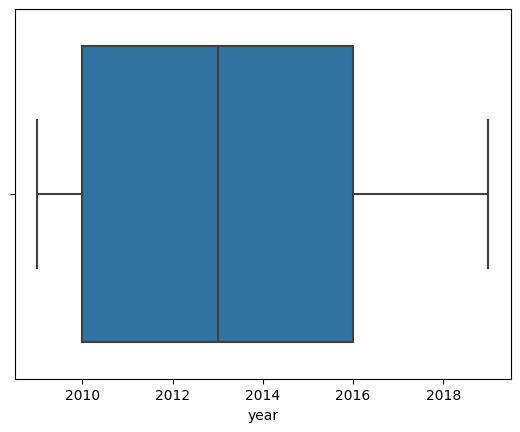

In [58]:
## Draw the box plot
sns.boxplot(data=books,x='year')

<Axes: xlabel='year', ylabel='genre'>

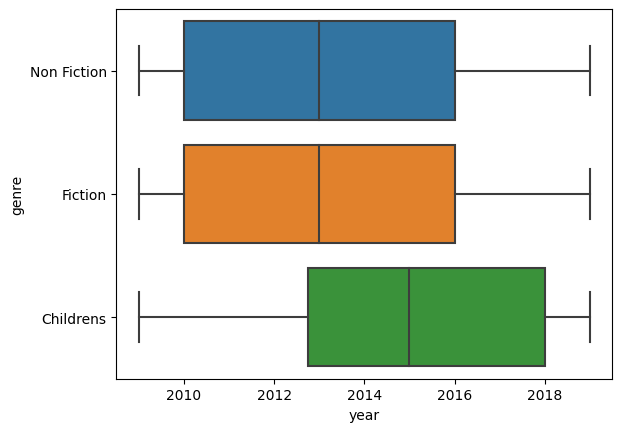

In [59]:
## Group wise box plot
sns.boxplot(data=books,x='year',y='genre')

## Data Summarization

In [61]:
books.groupby('genre').mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [63]:
books.select_dtypes('number').agg(['mean','std'])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [64]:
books.agg({
    'rating':['mean','std'],
    'year': ['median']
})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [65]:
books.groupby('genre').agg(
    mean_rating = ('rating','mean'),
    std_rating = ('rating','std'),
    median_year = ('year','median')
)


,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


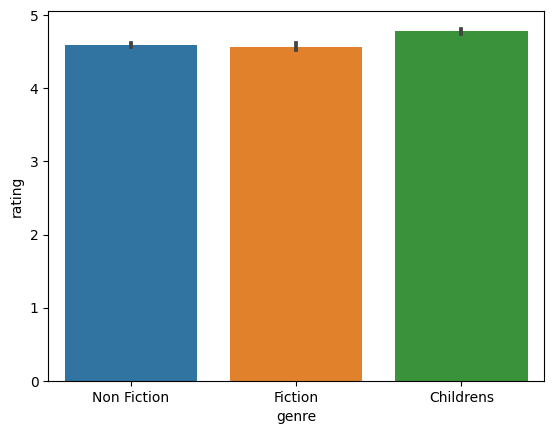

In [67]:
sns.barplot(data=books, x='genre', y='rating')
plt.show()

NameError: name 'hello' is not defined